# Recurrent Neural Network with 5 Input Features

In this notebook we will train a recurrent neural network using 5 input feature to perform binary classification of our dataset.

## Setup

We first need to import the libraries and frameworks to help us create and train our model. 

- Numpy will allow us to manipulate our input data
- Matplotlib gives us easy graphs to visualize performance
- Sklearn helps us with data normalization and shuffling
- Keras is our deep learning frameworks which makes it easy to create and train our model

## Load Data

Here we load the numpy array that we create previously. We also need to reformat the data so that it can be processed as a sequence by the recurrent model. Let's check the dimension to make sure they are correctly formatted.

## Data Preparation

The neural network will perform better during training if data is normalized. We also want to shuffle the inputs to avoid training out model on a skewed dataset.

## Training - Test Split

Ideally we would split our dataset into a training, validation and test set. For this example we will only use a training and validation set. The training set will have 3000 samples and the validation set will contain the remaining samples.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.utils import shuffle

from tensorflow.keras import models
from tensorflow.keras import layers

X = np.load("../db/x3.npy")
Y = np.load("../db/y3.npy")

transformer = Normalizer().fit(X)
X = transformer.transform(X) # normalizes data according to columns

X, Y = shuffle(X, Y, random_state=0) # shuffle the samples

X = np.reshape(X, (3559, 6, 5), order='F')
# np.save("x_time.npy", x_time)

X_train = X[:3000]
Y_train = Y[:3000]


X_test = X[3000:]
Y_test = Y[3000:]

print("Input training tensor: " + str(X_train.shape))
print("Label training tensor: " + str(Y_train.shape) + "\n")

# 559 test/validation samples
print("Input validation tensor: " + str(X_test.shape))
print("Label validation tensor: " + str(Y_test.shape))

Input training tensor: (3000, 6, 5)
Label training tensor: (3000,)

Input validation tensor: (559, 6, 5)
Label validation tensor: (559,)


## Defining our model

Here we finally create our model which in this case will be a 2 layer bidirectional LSTM with 64 recurrence unit. 

We also choose an optimizer (RMSprop), a loss function (binary crossentropy) and our metric for evaluation (accuracy).

We can also take a look at the size of our model

In [13]:
rnn = models.Sequential()
rnn.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
rnn.add(layers.Bidirectional(layers.LSTM(64)))
rnn.add(layers.Dense(1, activation='sigmoid'))

rnn.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

In [14]:
history = rnn.fit(
                X_train,
                Y_train,
                epochs=200,
                batch_size=30,
                validation_data=(X_test,Y_test)
                )

history_dict = history.history
rnn.summary()

print("Training accuracy: " + str(history_dict['accuracy'][-1]))
print("Training loss: " + str(history_dict['loss'][-1]) + "\n")

print("Validation accuracy: " + str(history_dict['val_accuracy'][-1]))
print("Validation loss: " + str(history_dict['val_loss'][-1]))

Epoch 1/200
100/100 [==============================] - 4s 41ms/step - loss: 0.6855 - accuracy: 0.5423 - val_loss: 0.6643 - val_accuracy: 0.6297
Epoch 2/200
100/100 [==============================] - 1s 14ms/step - loss: 0.6747 - accuracy: 0.6070 - val_loss: 0.6829 - val_accuracy: 0.5564
Epoch 3/200
100/100 [==============================] - 2s 16ms/step - loss: 0.6740 - accuracy: 0.6090 - val_loss: 0.6589 - val_accuracy: 0.6798
Epoch 4/200
100/100 [==============================] - 2s 16ms/step - loss: 0.6722 - accuracy: 0.6050 - val_loss: 0.6656 - val_accuracy: 0.5903
Epoch 5/200
100/100 [==============================] - 1s 14ms/step - loss: 0.6742 - accuracy: 0.6080 - val_loss: 0.6668 - val_accuracy: 0.5903
Epoch 6/200
100/100 [==============================] - 1s 12ms/step - loss: 0.6713 - accuracy: 0.6020 - val_loss: 0.6529 - val_accuracy: 0.6708
Epoch 7/200
100/100 [==============================] - 1s 12ms/step - loss: 0.6704 - accuracy: 0.6153 - val_loss: 0.6556 - val_accuracy:

100/100 [==============================] - 1s 14ms/step - loss: 0.5192 - accuracy: 0.7393 - val_loss: 0.5235 - val_accuracy: 0.7352
Epoch 58/200
100/100 [==============================] - 2s 18ms/step - loss: 0.5187 - accuracy: 0.7353 - val_loss: 0.5200 - val_accuracy: 0.7317
Epoch 59/200
100/100 [==============================] - 1s 13ms/step - loss: 0.5135 - accuracy: 0.7373 - val_loss: 0.5105 - val_accuracy: 0.7388
Epoch 60/200
100/100 [==============================] - 1s 14ms/step - loss: 0.5108 - accuracy: 0.7443 - val_loss: 0.5112 - val_accuracy: 0.7424
Epoch 61/200
100/100 [==============================] - 1s 13ms/step - loss: 0.5117 - accuracy: 0.7400 - val_loss: 0.4948 - val_accuracy: 0.7603
Epoch 62/200
100/100 [==============================] - 2s 16ms/step - loss: 0.5068 - accuracy: 0.7457 - val_loss: 0.5091 - val_accuracy: 0.7567
Epoch 63/200
100/100 [==============================] - 1s 13ms/step - loss: 0.5045 - accuracy: 0.7437 - val_loss: 0.5244 - val_accuracy: 0.740

100/100 [==============================] - 1s 11ms/step - loss: 0.4627 - accuracy: 0.7787 - val_loss: 0.4917 - val_accuracy: 0.7585
Epoch 114/200
100/100 [==============================] - 1s 11ms/step - loss: 0.4632 - accuracy: 0.7767 - val_loss: 0.5098 - val_accuracy: 0.7657
Epoch 115/200
100/100 [==============================] - 1s 11ms/step - loss: 0.4592 - accuracy: 0.7777 - val_loss: 0.4797 - val_accuracy: 0.7800
Epoch 116/200
100/100 [==============================] - 1s 11ms/step - loss: 0.4608 - accuracy: 0.7780 - val_loss: 0.4822 - val_accuracy: 0.7710
Epoch 117/200
100/100 [==============================] - 1s 11ms/step - loss: 0.4577 - accuracy: 0.7780 - val_loss: 0.4965 - val_accuracy: 0.7513
Epoch 118/200
100/100 [==============================] - 1s 11ms/step - loss: 0.4598 - accuracy: 0.7710 - val_loss: 0.5054 - val_accuracy: 0.7549
Epoch 119/200
100/100 [==============================] - 1s 11ms/step - loss: 0.4518 - accuracy: 0.7797 - val_loss: 0.4887 - val_accuracy:

100/100 [==============================] - 1s 12ms/step - loss: 0.4243 - accuracy: 0.7897 - val_loss: 0.4918 - val_accuracy: 0.7639
Epoch 170/200
100/100 [==============================] - 1s 12ms/step - loss: 0.4268 - accuracy: 0.7907 - val_loss: 0.4900 - val_accuracy: 0.7603
Epoch 171/200
100/100 [==============================] - 1s 15ms/step - loss: 0.4219 - accuracy: 0.7930 - val_loss: 0.4975 - val_accuracy: 0.7621
Epoch 172/200
100/100 [==============================] - 1s 12ms/step - loss: 0.4251 - accuracy: 0.7900 - val_loss: 0.4872 - val_accuracy: 0.7800
Epoch 173/200
100/100 [==============================] - 1s 14ms/step - loss: 0.4223 - accuracy: 0.7883 - val_loss: 0.5050 - val_accuracy: 0.7603
Epoch 174/200
100/100 [==============================] - 2s 15ms/step - loss: 0.4223 - accuracy: 0.7927 - val_loss: 0.5098 - val_accuracy: 0.7692
Epoch 175/200
100/100 [==============================] - 1s 14ms/step - loss: 0.4218 - accuracy: 0.7980 - val_loss: 0.4816 - val_accuracy:

## Evaluating the Model

After our training we get ~78% accuracy on our validation data. When looking at our loss, we can see that our model is indeed learning and it does begin to overfitting after approximately 100 epochs.

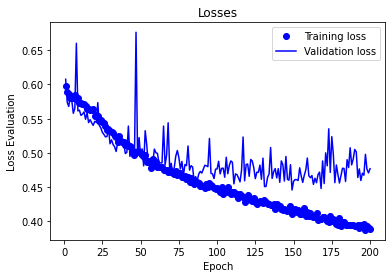

<Figure size 432x288 with 0 Axes>

In [11]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss Evaluation')
plt.legend()
plt.show()

plt.clf()

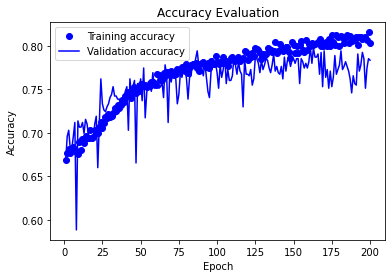

<Figure size 432x288 with 0 Axes>

In [12]:
loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Accuracy Evaluation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.clf()